## Introducing Pandas

Pandas is a popular open source library for data analysis built on top of the Python programming language and it is the nucleus in a large Python ecosystem of data science tools. Pandas is heavily used for data analysis and cleaning and it is easily integrated with libraries for statistics, [machine learning](https://scikit-learn.org/stable/), [web scraping](https://www.kaggle.com/code/patrickgomes/web-scraping-to-pandas-step-by-step-in-9-lines), [data visualization](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html) and more.


#### Import the Pandas library

Import the pandas library to get access to its features.

In [67]:
import pandas as pd
# pd.set_option('display.max_rows', None)

#### Importing a dataset

Pandas can import a variety of file types, each file type has its associated import method. We can use the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method to tell Pandas to open up the public [Wisconsin Diagnostic Breast Cancer (WDBC) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)), which contains 569 examples of malignant and benign tumor cells (features are computed from a digitized image of a fine needle aspirate and describe characteristics of the cell nuclei present in the image).

The [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method imports the CSV file's contents into an object called a **DataFrame**, a 2-dimensional data structure that can store data of different types in columns.

In [68]:
# ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [69]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# print(df.shape)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

Number of instances = 569
Number of attributes = 32


#### Taking a first look at the dataframe

We can get the first *N* rows of a DataFrame using the *head()* function. Similarly, we can get the last *N* rows using the *tail()* function.

In [70]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


This DataFrame consists of 32 columns and an index (the range of ascending numbers on the left side of the DataFrame). Index labels serve as identifiers for rows of data. We can set any column as the index of the DataFrame, if we do not explicitly tell pandas which column to use, the library generates a numeric index starting from 0.

We can inquire about the number of rows and columns in the DataFrame and extract a row by its index position (which starts counting at 0). This method returns an object of class **Series**, a one-dimensional labeled array of values.

In [71]:
print(df.shape)
print(df.iloc[2])

(569, 32)
id                         84300903
diagnosis                         M
radius_mean                   19.69
texture_mean                  21.25
perimeter_mean                130.0
area_mean                    1203.0
smoothness_mean              0.1096
compactness_mean             0.1599
concavity_mean               0.1974
concave points_mean          0.1279
symmetry_mean                0.2069
fractal_dimension_mean      0.05999
radius_se                    0.7456
texture_se                   0.7869
perimeter_se                  4.585
area_se                       94.03
smoothness_se               0.00615
compactness_se              0.04006
concavity_se                0.03832
concave points_se           0.02058
symmetry_se                  0.0225
fractal_dimension_se       0.004571
radius_worst                  23.57
texture_worst                 25.53
perimeter_worst               152.5
area_worst                   1709.0
smoothness_worst             0.1444
compactness_worst 

The describe() method provides a quick overview of the numerical data in a DataFrame.

In [72]:
df.describe()
# df[['radius_mean', 'perimeter_mean', 'area_mean']].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Selecting specific columns from a DataFrame

We can select some columns of a DataFrame by passing a list of column names to the indexing operator ([ ]) of the DataFrame.

Note that in the following example, the inner square brackets define a Python list with column names, whereas the outer brackets are used to select the data from a pandas DataFrame.


In [73]:
# print(df.columns)
df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'diagnosis']].tail(3)

,id,radius_mean,texture_mean,perimeter_mean,diagnosis
566,926954,16.60,28.08,108.30,M
567,927241,20.60,29.33,140.10,M
568,92751,7.76,24.54,47.92,B


To select a single column, use square brackets [ ] with the column name of the column of interest. If a single column is selected, the returned object is a pandas **Series**.

In [74]:
diagnoses = df['diagnosis']
print(type(diagnoses))
print(diagnoses.shape)

<class 'pandas.core.series.Series'>
(569,)


In [75]:
diagnoses.tail(3)

,diagnosis
566,M
567,M
568,B


#### Selecting specific rows from a DataFrame

To select rows based on a conditional expression, use a condition inside the selection brackets [ ] ([Boolean indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-boolean)).

The output of the conditional expression is actually a Pandas Series of boolean values (either True or False) with the same number of rows as the original DataFrame. Only rows for which the value is True will be selected.

In [76]:
mean_radius_gt_24 = df['radius_mean'] > 24.0
df[mean_radius_gt_24]

# mean_radius_gt_24
# print(mean_radius_gt_24.value_counts())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,M,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


We can specify multiple conditions using | (OR) and & (AND) operators and enclosing each condition inside a pair of parentheses.

In [77]:
df[(df['radius_mean'] > 24.0) & (df['texture_mean'] > 22.0)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


#### Creating plots in Pandas

[Matplotlib](https://matplotlib.org/) is a Python package used for data plotting and visualisation. It is a useful complement to Pandas, and like Pandas, is a very feature-rich library which can produce a large variety of plots, charts, maps, and other visualisations.

In [78]:
import matplotlib.pyplot as plt

As an example, we can make a scatter plot that shows the relationship between two numerical variables.

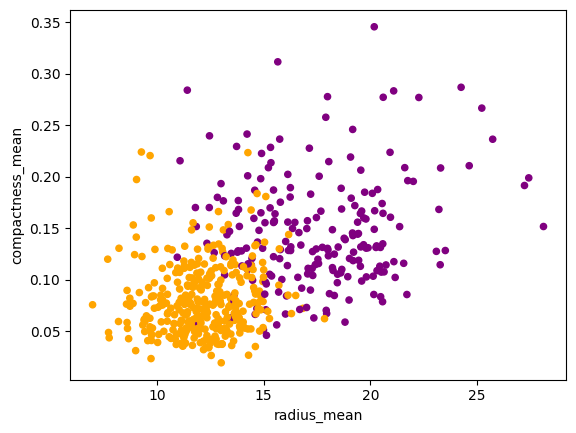

In [79]:
colors = {'B': 'orange', 'M': 'purple'}
color_list = [colors[group] for group in df['diagnosis']]

df.plot.scatter(x='radius_mean', y='compactness_mean', c=color_list)
plt.show()

Each of the plot objects created by Pandas is a [Matplotlib](https://matplotlib.org/) object. Matplotlib provides plenty of options to customize plots.

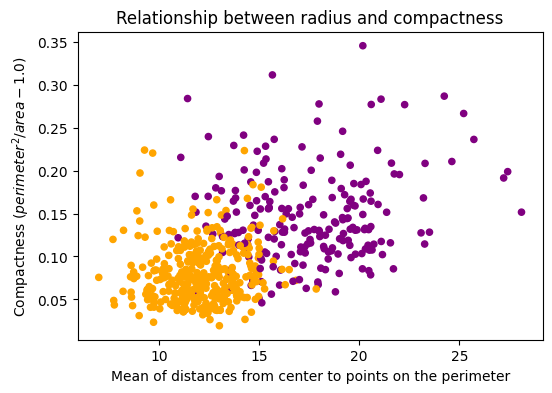

In [80]:
# Create an empty Matplotlib Figure and Axes
fig, axs = plt.subplots(figsize=(6, 4))

# Use pandas to put the scatter plot on the prepared Figure/Axes
df.plot.scatter(x='radius_mean', y='compactness_mean', c=color_list, ax=axs)

# Do some Matplotlib customization
axs.set_xlabel('Mean of distances from center to points on the perimeter')
axs.set_ylabel('Compactness ($ perimeter^2  / area - 1.0 $)')
plt.title('Relationship between radius and compactness')

# Save the Figure/Axes using the existing Matplotlib method.
fig.savefig("relationship_between_radius_and_compactness.png")
plt.show()

#### Calculating summary statistics and aggregating statistics grouped by category

Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

The statistic applied to multiple columns of a DataFrame (the selection of more than one column returns a DataFrame) is calculated for each numeric column.

In [81]:
df['radius_mean'].mean()

14.127291739894552

In [82]:
df[['radius_mean', 'perimeter_mean', 'area_mean']].max()

,0
radius_mean,28.11
perimeter_mean,188.50
area_mean,2501.00


We can group DataFrame rows into buckets, based on shared values in a given column or columns, by invoking the *groupby* method on a DataFrame. The method returns a **DataFrameGroupBy** object, a storage container that provides a set of methods to analyze each independent group.

To calculate a given statistic (e.g. the average radius) for each category in a column (e.g. benign/malignant in the diagnosis column):

* Make a subselection on these two columns: ```df[['diagnosis', 'radius_mean']]```
* Apply the groupby() method on the diagnosis column to make a group per category.
* Calculate the desired statistic for each category.

In [83]:
df[['diagnosis', 'radius_mean']].groupby('diagnosis').mean()
# df[['diagnosis', 'radius_mean', 'perimeter_mean']].groupby('diagnosis').mean()

,radius_mean
diagnosis,
B,12.146524
M,17.462830


The DataFrameGroupBy object stores a group for each unique value in the column we specify. Its ngroups method returns the number of groups, while its size method returns a Series with a list of the groups and their row counts.

The get_group method accepts a group name and returns a DataFrame with the corresponding rows.

In [84]:
print(df.groupby('diagnosis').ngroups)

2


In [85]:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [86]:
# df.groupby('diagnosis').get_group('B')
df.groupby('diagnosis').get_group('B').head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.239,0.12880,0.2977,0.07259
20,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183


#### Saving and exporting data

To save a Pandas DataFrame as a CSV file, use the DataFrame.to_csv() method.

By setting index=False the row index labels are not saved in the file.

In [87]:
df.to_csv('WDBC_dataset.csv', index=False)

Use the DataFrame.to_excel() method to export a Pandas DataFrame to an Excel file.


In [88]:
df.to_excel('WDBC_dataset.xlsx', sheet_name='WDBC', index=False)

In [90]:
%%shell
jupyter nbconvert --to html  /content/Pandas_Introduction.ipynb

[NbConvertApp] Converting notebook /content/Pandas_Introduction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 551255 bytes to /content/Pandas_Introduction.html
